# Graph Analysis
### Subgraphs of a graph
A **subgraph** is a graph formed by selecting a subset of nodes and/or edges from a larger graph. Thus, very subgraph is entirely contained within the original graph.
<br>**Formal definition of a subgraph:** Given a graph $G=(V,E)$, a graph $H=(V′,E′)$ is a subgraph of $G$, if:
- $V′\in V$ (node set $V'$ is a subset of node set $V$).
- $E′\in E$ (edge set $E'$ is a subset of edge set $E'$).
- Every edge in $E′$ must connect only nodes in $V′$ (i.e., if $(u,v)\in E′$, then $u,v\in V′$).

**Hint 1:** Every graph is a subgraph of itself. 
<br>**Hint 2:** A subgraph of a subgraph of $G$ is a subgraph of $G$.
<br>**Hint 3:** We have a number of different kinds of subgraphs. Some are mentioned here:
- Node-induced subgraph
- Edge induced subgraph
- Spanning subgraph
- Empty subgraph
- A complete subgraph (clique)

<hr>

In the following, we provide the Python code from scratch to check if a graph $H$ is a subgraph of another graph, say $G$, or not. For this purose, we will do in the code:
- Check if all nodes of $H$ are in $G$.
- Check if all edges of $H$ are in $G$.

Moreover, to display the graphs, we use a Python function to convert our graphs into **NetworkX** graphs.
<br>In addition, we use some functions of **NetworkX** regarding the topic of **subgraph**.
<hr>

https://github.com/ostad-ai/Graph-Analysis
<br>Explanation in English :https://www.pinterest.com/HamedShahHosseini/graph-analysis/

In [1]:
# Import module to diplay graphs
import networkx as nx
from matplotlib import pyplot as plt

In [2]:
# Define function to check if H is a subgraph of G
def is_subgraph(G, H, directed=False):
    """
    Check if H is a subgraph of G.
    
    Parameters:
    G (dict): Adjacency list of the larger graph {node: [neighbors]}
    H (dict): Adjacency list of the potential subgraph {node: [neighbors]}
    directed (bool): Whether the graphs are directed (default: False)
    
    Returns:
    bool: True if H is a subgraph of G, False otherwise
    """
    
    # 1. Check if all vertices of H are in G
    if not set(H.keys()).issubset(set(G.keys())):
        return False
    
    # 2. Check if all edges of H are in G
    for u in H:
        for v in H[u]:
            # Check if edge exists in G
            if directed:
                # For directed graphs: check if v is in G[u]
                if v not in G.get(u, []):
                    return False
            else:
                # For undirected graphs: check if v is in G[u] OR u is in G[v]
                if v not in G.get(u, []) and u not in G.get(v, []):
                    return False
    
    return True

In [3]:
# Example with an undirected graph
# Define the larger graph G
G = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'C', 'E'],
    'C': ['A', 'B', 'D'],
    'D': ['A', 'C'],
    'E': ['B']
}
#=======================
# Test case 1: H is a subgraph of G
H1 = {
    'A': ['B', 'C','D'],
    'B': ['A'],
    'C': ['A']
}
print("H1 is subgraph of G:", is_subgraph(G, H1))  # True
#-------------------
# Test case 2: H is NOT a subgraph of G (missing edge)
H2 = {
    'A': ['B', 'E'],  # A-E doesn't exist in G
    'B': ['A']
}
print("H2 is subgraph of G:", is_subgraph(G, H2))  # False

H1 is subgraph of G: True
H2 is subgraph of G: False


In [4]:
# Example with a directed graph
# Define the test directed graph
G_dir = {
    'A': ['B', 'C'],
    'B': ['C'],
    'C': []
}

#=======================
# Test case
H_dir = {
    'A': ['B'],
    'B': ['C']
}
print("H_dir is subgraph of G_dir:", 
      is_subgraph(G_dir, H_dir, directed=True))  # True

H_dir is subgraph of G_dir: True


In [5]:
# Extra, a function to convert your graph to Networkx style,
# introduced in an earlier post
def convert_to_networkx(your_graph, directed=False):
    """
    Convert your custom graph to NetworkX format.
    your_graph: dict in format {node: [neighbors]}
    """
    if directed:
        nx_graph = nx.DiGraph()
    else:
        nx_graph = nx.Graph()
    
    for u, neighbors in your_graph.items():
        for v in neighbors:
            if isinstance(v,tuple):
                nx_graph.add_edge(u, v[0],weight=v[1])
            else:
                nx_graph.add_edge(u, v)
    
    return nx_graph

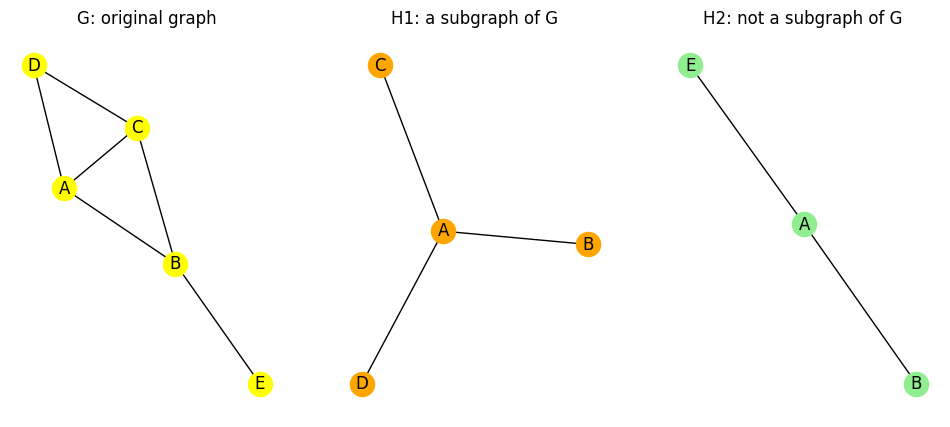

In [6]:
# Show the large graph G with its subgraph
G_nx=convert_to_networkx(G)
H1_nx=convert_to_networkx(H1)
H2_nx=convert_to_networkx(H2)
plt.figure(figsize=(12,5))
plt.subplot(131); plt.title('G: original graph')
nx.draw(G_nx,with_labels=True,node_color='yellow')
plt.subplot(132); plt.title('H1: a subgraph of G')
nx.draw(H1_nx,with_labels=True,node_color='orange')
plt.subplot(133); plt.title('H2: not a subgraph of G')
nx.draw(H2_nx,with_labels=True,node_color='lightgreen')

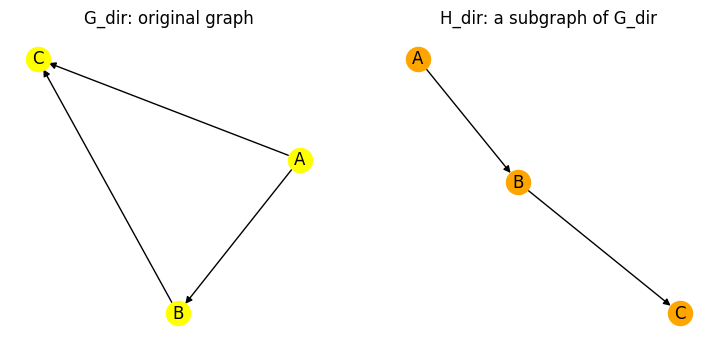

In [7]:
# Show the large graph G with its subgraph
G_dir_nx=convert_to_networkx(G_dir,directed=True)
H_dir_nx=convert_to_networkx(H_dir,directed=True)
plt.figure(figsize=(9,4))
plt.subplot(121); plt.title('G_dir: original graph')
nx.draw(G_dir_nx,with_labels=True,node_color='yellow')
plt.subplot(122); plt.title('H_dir: a subgraph of G_dir')
nx.draw(H_dir_nx,with_labels=True,node_color='orange')

<hr style="height:2px;background-color:magenta">

In the cell below, we use some functions of **NetworkX** for the topic of this Notebook.

Node-induced subgraph edges: [('A', 'B'), ('A', 'D'), ('B', 'E'), ('D', 'E')]
Edge-induced subgraph nodes: ['A', 'B', 'D', 'E']
Spanning subgraph edges: [('A', 'B'), ('A', 'D'), ('B', 'C'), ('D', 'E')]


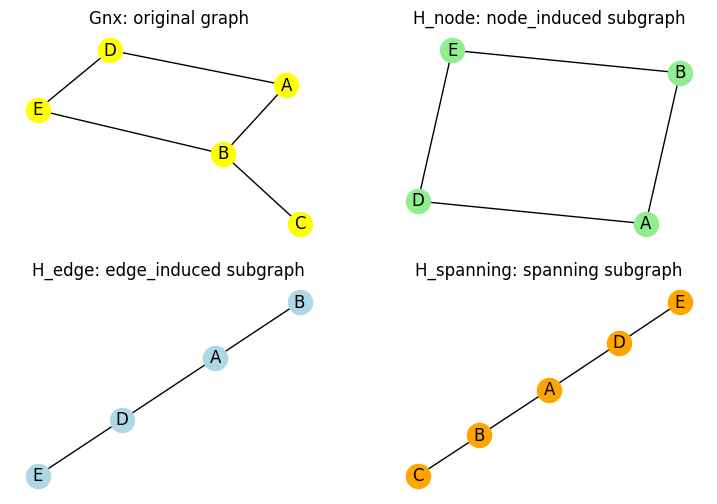

In [9]:
# Extra 2
# Use the functions of NetworkX
# Create original graph
Gnx = nx.Graph()
Gnx.add_edges_from([('A', 'B'), ('B', 'C'), ('A', 'D'), ('B', 'E'), ('D', 'E')])

# Node-induced subgraph
nodes_subset = ['A', 'B', 'D', 'E']
H_node = Gnx.subgraph(nodes_subset)
print("Node-induced subgraph edges:", list(H_node.edges()))

# Edge-induced subgraph (by selecting edges)
edges_subset = [('A', 'B'), ('A', 'D'), ('D', 'E')]
H_edge = Gnx.edge_subgraph(edges_subset)
print("Edge-induced subgraph nodes:", list(H_edge.nodes()))

# Spanning subgraph (keep all nodes, remove some edges)
spanning_edges = [('A', 'B'), ('B', 'C'), ('A', 'D'), ('D', 'E')]
H_spanning = nx.Graph(spanning_edges)
H_spanning.add_nodes_from(Gnx.nodes())  # Ensure all vertices are included
print("Spanning subgraph edges:", list(H_spanning.edges()))
#-----------------------
# Display the graph and it subgraphs
plt.figure(figsize=(9,6))
plt.subplot(221); plt.title('Gnx: original graph')
nx.draw(Gnx,with_labels=True,node_color='yellow')
plt.subplot(222); plt.title('H_node: node_induced subgraph')
nx.draw(H_node,with_labels=True,node_color='lightgreen')
plt.subplot(223); plt.title('H_edge: edge_induced subgraph')
nx.draw(H_edge,with_labels=True,node_color='lightblue')
plt.subplot(224); plt.title('H_spanning: spanning subgraph')
nx.draw(H_spanning,with_labels=True,node_color='orange')